In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def softmax(x):
    exp_x = np.exp(x-np.max(x))
    return exp_x/np.sum(exp_x, axis=-1, keepdims=True)

In [9]:
def mse(gt, logits, espilon=1e-7):
    probs = softmax(logits)
    return np.sum((gt-probs)**2)

In [10]:
def ce(gt, logits, epsilon=1e-7):
    probs = softmax(logits)
    probs = np.clip(probs, epsilon, 1. -epsilon)
    return -np.sum(gt * np.log(probs))

In [31]:
y = np.asarray([1, 0, 0])
logits = np.asarray([-5,5, -1000])

In [32]:
mse(y, logits), ce(y, logits)

(np.float64(1.9998184126471235), np.float64(10.000045398899218))

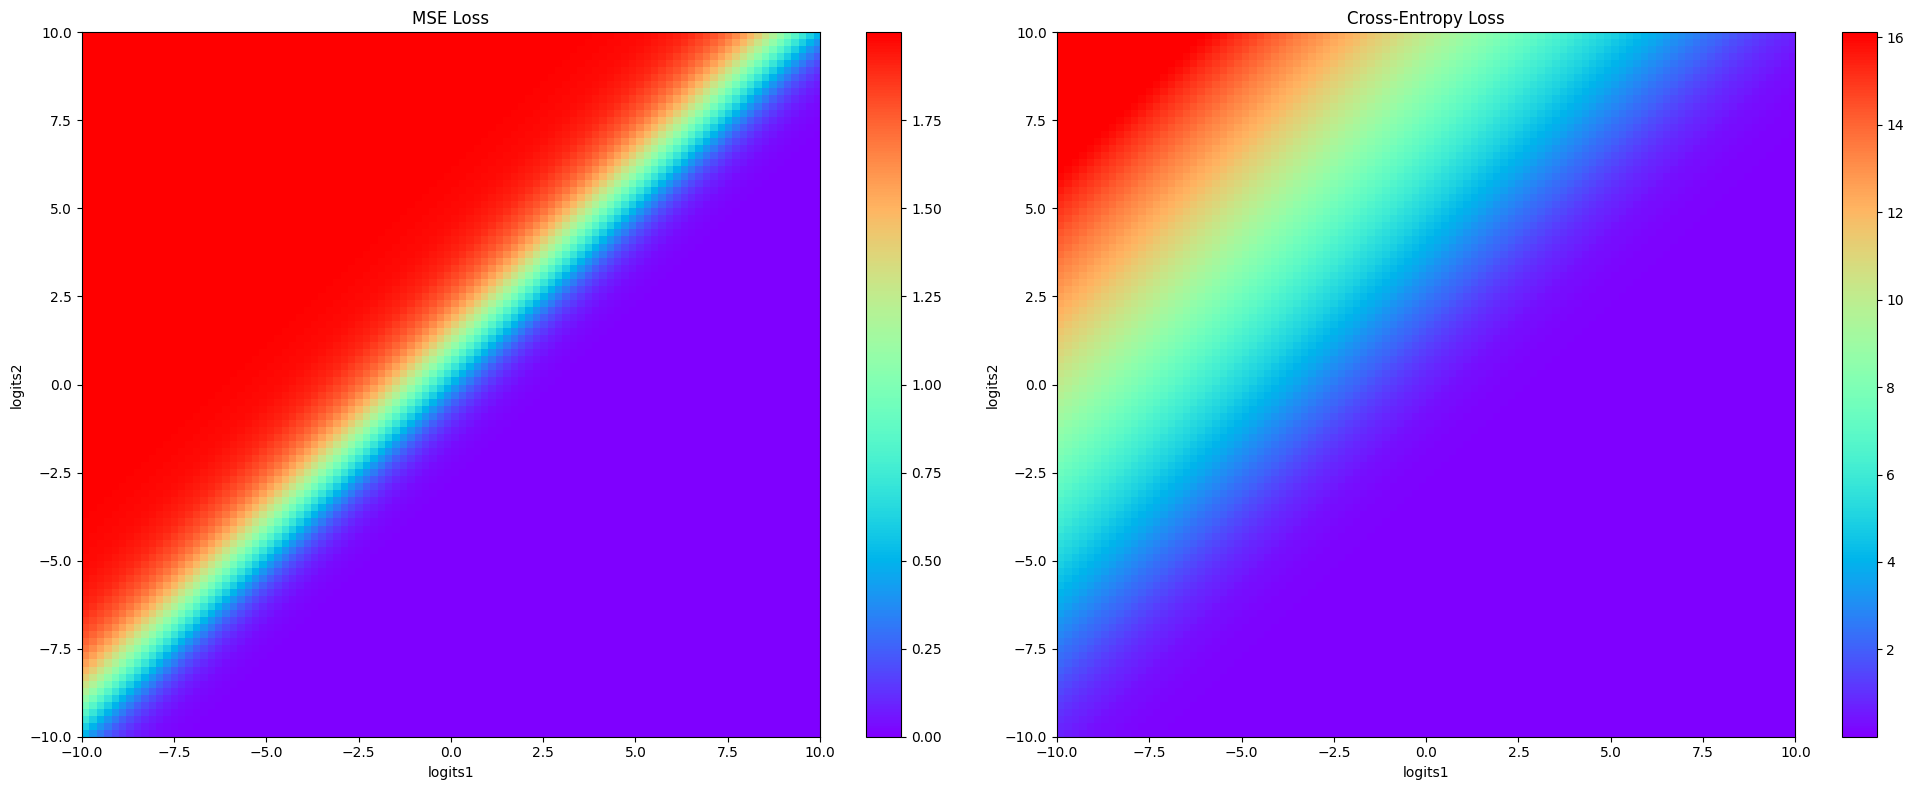

In [33]:
logits1 = np.linspace(-10, 10, 100)
logits2 = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(logits1, logits2)

Z_mse = np.zeros_like(X)
Z_ce = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        logits = np.array([X[i,j], Y[i,j], -1000])
        Z_mse[i,j] = mse(y, logits)
        Z_ce[i,j] = ce(y, logits)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))

im1 = ax1.imshow(Z_mse, extent=[-10, 10, -10, 10], 
                 origin='lower', aspect='auto', 
                 # cmap='viridis'
                 cmap='rainbow'
                )
ax1.set_title('MSE Loss')
ax1.set_xlabel('logits1')
ax1.set_ylabel('logits2')
plt.colorbar(im1, ax=ax1)

im2 = ax2.imshow(Z_ce, extent=[-10, 10, -10, 10], 
                 origin='lower', aspect='auto',  
                 # cmap='viridis'
                 cmap='rainbow'
                )
ax2.set_title('Cross-Entropy Loss')
ax2.set_xlabel('logits1')
ax2.set_ylabel('logits2')
plt.colorbar(im2, ax=ax2)

plt.tight_layout()
plt.show()